In [123]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [124]:
loans = pd.read_csv(r'C:\Users\ACER\Videos\DATA SCIENCE ZIP FILES\part 5\assignment\decision tree and random forest\loan_data.csv')
loans

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [125]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [126]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [127]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [128]:
from matplotlib import pyplot

In [129]:
x = loans['fico']
y =loans['credit.policy']

(array([[   0.,    0.,    0.,    0.,    0.,    0.,    0.,  489., 7183.,
         1906.],
        [9578.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.]]),
 array([  0. ,  82.7, 165.4, 248.1, 330.8, 413.5, 496.2, 578.9, 661.6,
        744.3, 827. ]),
 <a list of 2 Lists of Patches objects>)

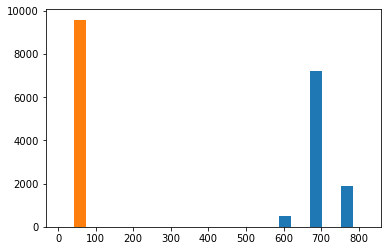

In [130]:
plt.hist([x,y])

In [131]:
cat_feats =['inq.last.6mths','delinq.2yrs','pub.rec','credit.policy','purpose']

In [132]:
data_with_dummies = pd.get_dummies(loans, columns=cat_feats, drop_first = True)

In [133]:
data_with_dummies

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,not.fully.paid,inq.last.6mths_1,...,pub.rec_3,pub.rec_4,pub.rec_5,credit.policy_1,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,...,0,0,0,1,0,1,0,0,0,0
1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,...,0,0,0,1,1,0,0,0,0,0
2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,0,1,...,0,0,0,1,0,1,0,0,0,0
3,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,0,1,...,0,0,0,1,0,1,0,0,0,0
4,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,0,...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,1,0,...,0,0,0,0,0,0,0,0,0,0
9574,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,1,0,...,0,0,0,0,0,0,0,0,0,0
9575,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,1,0,...,0,0,0,0,0,1,0,0,0,0
9576,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,1,0,...,0,0,0,0,0,0,0,1,0,0


In [134]:
data_with_dummies.columns.values

array(['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico',
       'days.with.cr.line', 'revol.bal', 'revol.util', 'not.fully.paid',
       'inq.last.6mths_1', 'inq.last.6mths_2', 'inq.last.6mths_3',
       'inq.last.6mths_4', 'inq.last.6mths_5', 'inq.last.6mths_6',
       'inq.last.6mths_7', 'inq.last.6mths_8', 'inq.last.6mths_9',
       'inq.last.6mths_10', 'inq.last.6mths_11', 'inq.last.6mths_12',
       'inq.last.6mths_13', 'inq.last.6mths_14', 'inq.last.6mths_15',
       'inq.last.6mths_16', 'inq.last.6mths_17', 'inq.last.6mths_18',
       'inq.last.6mths_19', 'inq.last.6mths_20', 'inq.last.6mths_24',
       'inq.last.6mths_25', 'inq.last.6mths_27', 'inq.last.6mths_28',
       'inq.last.6mths_31', 'inq.last.6mths_32', 'inq.last.6mths_33',
       'delinq.2yrs_1', 'delinq.2yrs_2', 'delinq.2yrs_3', 'delinq.2yrs_4',
       'delinq.2yrs_5', 'delinq.2yrs_6', 'delinq.2yrs_7', 'delinq.2yrs_8',
       'delinq.2yrs_11', 'delinq.2yrs_13', 'pub.rec_1', 'pub.rec_2',
       'pub.rec_3', 

In [135]:
cols= [ 'not.fully.paid','int.rate', 'installment', 'log.annual.inc', 'dti', 'fico',
       'days.with.cr.line', 'revol.bal', 'revol.util','inq.last.6mths_1', 'inq.last.6mths_2', 'inq.last.6mths_3',
       'inq.last.6mths_4', 'inq.last.6mths_5', 'inq.last.6mths_6',
       'inq.last.6mths_7', 'inq.last.6mths_8', 'inq.last.6mths_9',
       'inq.last.6mths_10', 'inq.last.6mths_11', 'inq.last.6mths_12',
       'inq.last.6mths_13', 'inq.last.6mths_14', 'inq.last.6mths_15',
       'inq.last.6mths_16', 'inq.last.6mths_17', 'inq.last.6mths_18',
       'inq.last.6mths_19', 'inq.last.6mths_20', 'inq.last.6mths_24',
       'inq.last.6mths_25', 'inq.last.6mths_27', 'inq.last.6mths_28',
       'inq.last.6mths_31', 'inq.last.6mths_32', 'inq.last.6mths_33',
       'delinq.2yrs_1', 'delinq.2yrs_2', 'delinq.2yrs_3', 'delinq.2yrs_4',
       'delinq.2yrs_5', 'delinq.2yrs_6', 'delinq.2yrs_7', 'delinq.2yrs_8',
       'delinq.2yrs_11', 'delinq.2yrs_13', 'pub.rec_1', 'pub.rec_2',
       'pub.rec_3', 'pub.rec_4', 'pub.rec_5', 'credit.policy_1',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement',
       'purpose_major_purchase', 'purpose_small_business']

In [136]:
final_data = data_with_dummies[cols]
final_data

,not.fully.paid,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths_1,...,pub.rec_3,pub.rec_4,pub.rec_5,credit.policy_1,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,0,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,...,0,0,0,1,0,1,0,0,0,0
1,0,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,...,0,0,0,1,0,1,0,0,0,0
3,0,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,...,0,0,0,1,0,1,0,0,0,0
4,0,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,1,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,0,...,0,0,0,0,0,0,0,0,0,0
9574,1,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,0,...,0,0,0,0,0,0,0,0,0,0
9575,1,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,0,...,0,0,0,0,0,1,0,0,0,0
9576,1,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,0,...,0,0,0,0,0,0,0,1,0,0


In [137]:
x = final_data.drop(['not.fully.paid'], axis = 1)
y = final_data['not.fully.paid']

In [138]:
from sklearn.model_selection import train_test_split as tt

In [139]:
xtrain, xtest, ytrain, ytest = tt(x,y,test_size=0.3, random_state=101)


In [140]:
from sklearn.tree import DecisionTreeRegressor

In [141]:
dtree = DecisionTreeRegressor(random_state= 0)

In [142]:
dtree.fit(xtrain,ytrain)

DecisionTreeRegressor(random_state=0)

In [143]:
ypred = dtree.predict(xtest)

In [144]:
from sklearn.metrics import classification_report

In [145]:
classification_report(ytest, ypred)

'              precision    recall  f1-score   support\n\n           0       0.85      0.82      0.84      2431\n           1       0.16      0.19      0.17       443\n\n    accuracy                           0.73      2874\n   macro avg       0.51      0.51      0.51      2874\nweighted avg       0.74      0.73      0.73      2874\n'

In [146]:
from sklearn.metrics import confusion_matrix

In [147]:
cm = confusion_matrix(ytest, ypred)

In [148]:
cm

array([[2004,  427],
       [ 360,   83]], dtype=int64)

In [149]:
from sklearn.ensemble import RandomForestRegressor

In [150]:
regressor = RandomForestRegressor(n_estimators = 600)

In [151]:
regressor.fit(xtrain,ytrain)

RandomForestRegressor(n_estimators=600)

In [152]:
pred =  regressor.predict(xtest)

In [160]:
from sklearn.metrics import classification_report

In [156]:
classification_report(ytest,pred)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [157]:
cm = confusion_matrix(ytest, pred)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [158]:
cm

array([[2004,  427],
       [ 360,   83]], dtype=int64)